ΕΡΓΑΣΙΑ ΑΝΑΚΤΗΣΗΣ ΠΛΗΡΟΦΟΡΙΑΣ
ΙΩΑΝΝΗΣ ΜΑΝΤΖΑΚΟΣ (ice21390126), ΓΙΩΡΓΙΟΣ ΛΙΟΥΝΑΚΟΣ (ice21390121)

In [1]:
import requests
import json
import nltk
import string
import math
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import defaultdict, Counter
from locale import normalize
from nltk.corpus import stopwords
from nltk.draw.dispersion import dispersion_plot
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

BHMA 1o

Σε αυτό το βήμα έχουμε φτιάξει δύο συναρτήσεις που συλλέγουν και αποθηκεύουν δεδομένα από άρθρα της Wikipedia. Η συνάρτηση fetch_articles_from_wiki πραγματοποιεί αίτημα HTTP σε ένα άρθρο της Wikipedia και εξαγάγει τον τίτλο και το περιεχόμενο του άρθρου ως κείμενο. Στη συνέχεια, η συνάρτηση collect_articles χρησιμοποιεί τη fetch_articles_from_wiki και συλλέγει τα δεδομένα από μια λίστα άρθρων, οργανώνει αυτά τα δεδομένα σε μορφή λίστας, και τα αποθηκεύει σε αρχείο JSON για περαιτέρω χρήση.

In [2]:
#ΒΗΜΑ 1ο ###############################################################################################################

# Συνάρτηση λήψης δεδομένων από κάθε άρθρο τις λίστας
def fetch_articles_from_wiki(title):
    base_url = "https://en.wikipedia.org/wiki/"
    url = base_url + title.replace(" ", "_")
    response = requests.get(url) # Αίτημα HTTP GET στο URL

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser") # Ανάλυση περιεχομένου HTML

        title = soup.find("h1", {"id": "firstHeading"}).text #Εξαγωγή τίτλου και κειμένου
        paragraphs = soup.find_all("p") # Εύρεση όλων των παραγράφων
        content = " ".join([p.text for p in paragraphs]) # Ένωση παραγράφψν σε ένα κείμενο
        return {"title": title, "content": content} # Επιστροφή τίτλου και περιεχομένου
    else:
        print(f"Failed to fetch {title}")
        return None

# Συνάρτηση φόρτωσης και αποθήκευσης δεδομένων από τα άρθρα
def collect_articles(articles, output):
    article_data = []
    for article in articles:
        data = fetch_articles_from_wiki(article) # Κλήση συνάρτησης λήψης δεδομένων από κάθε άρθρο τις λίστας
        if data:
            article_data.append(data) # Προσθήκη κάθε δεδομένου στην λίστα

    # Αποθήκευση δεδομένων σε JSON
    with open(output, "w", encoding="utf-8") as f:
        json.dump(article_data, f, ensure_ascii=False, indent=4) # Αποθήκευση σε JSON
    print("Artciles Saved Successfully!!!")

ΒΗΜΑ 2ο

Σε αυτό το βήμα υλοποιείτε η προεπεξεργασία του περιεχομένου των άρθρων και την αποθήκευσή τους. Η συνάρτηση preprocess_text λαμβάνει το κείμενο ενός άρθρου και εκτελεί σειρά από βήματα προεπεξεργασίας. Πιο συγκεκριμένα αφαιρεί τα σημεία στίξης, μετατρέπει το κείμενο σε πεζά γράμματα, διαχωρίζει το κείμενο σε tokens (λέξεις), αφαιρεί τα stopwords (λέξεις χωρίς σημασιολογική αξία, π.χ., "and", "the"), και μπορεί να εφαρμόσει stemming για την απλοποίηση των λέξεων στη ρίζα τους. Το stemming δεν το αξιοποιήσαμε στο τελικό αποτέλεσμα καθώς αντιμετωπίζαμε προβλήματα με αυτό, τα οποία εξηγούνται στο pdf αναφοράς.

Η συνάρτηση preprocess_articles_data φορτώνει τα δεδομένα άρθρων από ένα αρχείο JSON, εφαρμόζει τη συνάρτηση preprocess_text στο περιεχόμενο κάθε άρθρου, και αποθηκεύει τα προεπεξεργασμένα δεδομένα σε ένα νέο αρχείο JSON.

In [3]:
#ΒΗΜΑ 2ο ###############################################################################################################

# Συνάρτηση επεξεργασίας περιεχομένου κάθε άρθρου
def preprocess_text(text):
    text = text.translate(str.maketrans("", "", string.punctuation)) # Αφαίρεση σημείων στίξης

    tokens = word_tokenize(text.lower()) # Tokenization και μετατροπή σε πεζά γράμματα

    # Αφαίρεση stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Εφαρμογή Stemming
    #stemmer = PorterStemmer()
    #tokens = [stemmer.stem(word) for word in tokens]
    return tokens

# Συνάρτηση φόρτωσης και αποθήκευσης επεξεργασμένων δεδομένων των άρθρων
def preprocess_articles_data(input, output):
    with open(input, "r", encoding="utf-8") as f:
        data = json.load(f) # Φόρτωση δεδομένων από το αρχείο του 1ου Βήματος

    for article in data:
        article["tokens"] = preprocess_text(article["content"]) # Κλήση συνάρτησης επεξεργασίας περιεχομένου κάθε άρθρου

    # Αποθήκευση δεδομένων σε JSON
    with open(output, "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4) # Αποθήκευση σε JSON
    print("Preporcessed Articles Data Saved Successully!!!")

ΒΗΜΑ 3ο

Σε αυτό το βήμα η συνάρτηση iverted_index_creation λαμβάνει ως είσοδο μια λίστα δεδομένων άρθρων. Για κάθε άρθρο, αποθηκεύει τα tokens που περιέχονται στο κείμενό του. Σε κάθε όρο αντιστοιχίζει μια λίστα με τους δείκτες των άρθρων όπου αυτός εμφανίζεται. Με αυτόν τον τρόπο δημιουργείται μια δομή που επιτρέπει γρήγορη εύρεση των άρθρων στα οποία εμφανίζεται κάθε όρος.

Η συνάρτηση index_creation διαβάζει τα προεπεξεργασμένα δεδομένα άρθρων από το αρχείο JSON του Βήματος 2, καλεί τη συνάρτηση iverted_index_creation για τη δημιουργία του ανεστραμμένου ευρετηρίου, και αποθηκεύει το ευρετήριο σε ένα νέο αρχείο JSON.

In [4]:
#ΒΗΜΑ 3ο ###############################################################################################################

# Συνάρτηση δημιουργίας ανεστραμένου ευρετηρίου
def iverted_index_creation(data):
    inverted_index = defaultdict(list) # Χρήση defaultdict για εύκολη αποθήκευση
    for index, article in enumerate(data):
        for token in set(article["tokens"]): # Χρήση μεθόδου set() για αποφυγή διπλότυπων tokens
            inverted_index[token].append(index) # Αποθήκευση δείκτη κάθε άρθρου για κάθε όρο
    return inverted_index

# Συνάρτηση δημιουργίας ευρετηρίου
def index_creation(input, output):
    with open(input, "r", encoding="utf-8") as f:
        data = json.load(f) # Φόρτωση των προ-επεξεργαμένων δεδομένων από το αρχείο του 2ου Βήματος

    inverted_index = iverted_index_creation(data) # Κλήση συνάρτησης δημιουργίας ανεστραμένου ευρετηρίου

    # Αποθήκευση δεδομένων σε JSON
    with open(output, "w", encoding="utf-8") as f:
        json.dump(inverted_index, f, ensure_ascii=False, indent=4) # Αποθήκευση σε JSON
    print("Inverted Index Saved Successfully!!!")

Βήμα 4ο

Στο βήμα αυτό, υλοποιούνται οι αλγόριθμοι αναζήτησης Boolean Search, TF-IDF, Vector Space Model και Okapi BM25, καθώς και βοηθητικές συναρτήσεις που βοηθούν στην απεικόνιση των αποτελεσμάτων.

Η συνάρτηση plot_dispersion λαμβάνει τα tokens του ερωτήματος που θέλουμε να εξετάσουμε και τα προεπεξεργασμένα άρθρα και εμφανίζει το διάγραμμα διασποράς είναι χρήσιμο για την οπτική απεικόνιση της συχνότητας και της κατανομής συγκεκριμένων λέξεων στο σύνολο από άρθρα που κατέχουμε.

In [5]:
#ΒΗΜΑ 4ο ###############################################################################################################

# Συνάρτηση εμφάνισης λεξικού διασποράς λέξεων
def plot_dispersion(tokens, preprocessed_articles):
    all_tokens = []
    for article in preprocessed_articles:
        all_tokens.extend(article["tokens"])

    dispersion_plot(all_tokens, tokens)
    plt.title("Dispersion Plot")
    plt.show()

BOOLEAN RETRIEVAL

Η συνάρτηση boolean_retrieval υλοποιεί έναν απλό αλγόριθμο αναζήτησης που χρησιμοποιεί λογικούς τελεστές όπως AND, OR και NOT για να φιλτράρει αποτελέσματα στο προεπεξεργασμένο ανεστραμμένο ευρετήριο. Επεξεργάζεται το ερώτημα του χρήστη, βρίσκει τα σχετικά έγγραφα που πληρούν τις συνθήκες, και επιστρέφει μια λίστα με τους τίτλους και τα περιεχόμενά τους.

In [6]:
# Συνάρτηση υλοποίησης αλγορίθμου Boolean Retrieval
def boolean_retrieval(query, preprocessed_articles, inverted_index):
    query_tokens = query.lower().split()

    and_terms = []
    or_terms = []
    not_terms = []

    mode = "and"
    for token in query_tokens:
        if token == "and":
            mode = "and"
        elif token == "or":
            mode = "or"
        elif token == "not":
            mode = "not"
        else:
            if mode == "and":
                and_terms.append(token)
            elif mode == "or":
                or_terms.append(token)
            elif mode == "not":
                not_terms.append(token)


    # Επεξεργασία AND όρων
    and_results = None
    for term in and_terms:
        if term in inverted_index:
            term_docs = set(inverted_index[term])
            if and_results is None:
                and_results = term_docs
            else:
                and_results &= term_docs

    # Αν δεν υπάρχουν AND όροι, αρχικοποιήστε το σύνολο
    if and_results is None:
        and_results = set(range(len(preprocessed_articles)))  # Όλα τα έγγραφα

    # Επεξεργασία OR όρων
    or_results = set()
    for term in or_terms:
        if term in inverted_index:
            term_docs = set(inverted_index[term])
            or_results |= term_docs

    # Επεξεργασία NOT όρων
    not_results = set()
    for term in not_terms:
        if term in inverted_index:
            term_docs = set(inverted_index[term])
            not_results |= term_docs

    # Συνδυασμός των αποτελεσμάτων
    final_results = and_results  # Ξεκινάμε με τα αποτελέσματα AND
    final_results |= or_results  # Προσθέτουμε τα αποτελέσματα OR
    final_results -= not_results  # Αφαιρούμε τα αποτελέσματα NOT

    # Δημιουργία λίστας αποτελεσμάτων
    return [(preprocessed_articles[doc_id]["title"], preprocessed_articles[doc_id]["content"])for doc_id in sorted(final_results)]


Η συνάρτηση compute_idf υπολογίζει την τιμή της αντίστροφης συχνότητας εγγράφων (IDF) για κάθε όρο που περιέχεται στο ανεστραμμένο ευρετήριο. Η IDF μετράει πόσο σημαντικός είναι ένας όρος, λαμβάνοντας υπόψη τη συχνότητά του σε όλα τα έγγραφα. Επιστρέφει ένα λεξικό όπου κάθε όρος αντιστοιχεί στην IDF τιμή του.

In [7]:
# Συνάρτηση υπολογισμού της IDF (Inverse Document Frequency) για κάθε όρο
def compute_idf(inverted_index, preprocessed_articles):
    idf = {} #Λεξικό IDF για τις τιμές κάθε όρου
    for term, docs in inverted_index.items(): # Διατρέχει όλους τους όρους στο ανεστραμμένο ευρετήριο
        idf[term] = math.log( 1 + (preprocessed_articles / (1 + len(docs))))  # Υπολογίζει την IDF: log(1 + (συνολικά άρθρα / (1 + αριθμός εγγράφων που περιέχουν τον όρο)))
    return idf # Επιστρέφει το λεξικό IDF


TF-IDF

Η συνάρτηση compute_tfidf υλοποιεί τον αλγόριθμο TF-IDF για να βαθμολογήσει και να ταξινομήσει έγγραφα με βάση τη συνάφειά τους με ένα ερώτημα. Υπολογίζει τη συχνότητα όρου (TF) για κάθε όρο του ερωτήματος που υπάρχει στα επεξεργασμένα άρθρα, την κανονικοποιεί ως προς το μήκος του άρθρου, και την πολλαπλασιάζει με την αντίστοιχη τιμή IDF για τον όρο. Τα έγγραφα ταξινομούνται με φθίνουσα σειρά με βάση το συνολικό τους σκορ TF-IDF και επιστρέφονται ως λίστα με τίτλους, περιεχόμενο, και σκορ.

In [8]:
# Συνάρτηση υλοποίησης αλγορίθμου TF-IDF
def compute_tfidf(query, preprocessed_articles, inverted_index, idf):
    score = defaultdict(float) # Λεξικό με αρχική τιμή float για την αποθήκευση των TF-IDF σκορ
    query_tokens = preprocess_text(query)  # Μετατροπή ερωτήματος σε tokens

    for term in query_tokens:  # Περιορισμός στους όρους του ερωτήματος
        if term in inverted_index: # Για κάθε όρο στο ανεστραμμένο ευρετήριο
            for doc_id in inverted_index[term]: # Για κάθε άρθρο που περιέχει τον όρο
                tf = preprocessed_articles[doc_id]["tokens"].count(term) # Υπολογίζει τη συχνότητα του όρου
                doc_len = len(preprocessed_articles[doc_id]["tokens"]) # Υπολογίζει το μήκος του άρθρου
                normalized_tf = tf / doc_len # Υπολογίζει το κανονικοποιημένο TF
                score[doc_id] += normalized_tf * idf.get(term, 0) # Προσθέτει το TF-IDF σκορ στο έγγραφο

    ranked_results = sorted(score.items(), key=lambda x: x[1], reverse=True) # Ταξινομεί τα έγγραφα κατά φθίνουσα σειρά TF-IDF σκορ
    return [(preprocessed_articles[doc_id]["title"], preprocessed_articles[doc_id]["content"], score)for doc_id, score in ranked_results]
    # Επιστρέφει μια λίστα από tuples με τον τίτλο, το περιεχόμενο, και το σκορ κάθε άρθρου


VECTOR SPACE MODEL

Η συνάρτηση vector_space_model υλοποιεί το μοντέλο διανυσματικού χώρου (Vector Space Model) για την αξιολόγηση της συνάφειας εγγράφων με ένα ερώτημα. Αρχικά, μετατρέπει το ερώτημα σε tokens και δημιουργεί το διάνυσμα όρων του. Στη συνέχεια, υπολογίζει το σκορ κάθε εγγράφου ως τον πολλαπλασιασμό της συχνότητας όρων (TF) με την IDF τιμή για τους όρους του ερωτήματος. Χρησιμοποιεί τη μέθοδο της συνημιτοειδούς ομοιότητας (cosine similarity) για να μετρήσει τη γωνιακή εγγύτητα μεταξύ του διανύσματος του ερωτήματος και των διανυσμάτων των εγγράφων. Τέλος, όπως και η συνάρτηση που υλοποιεί τον αλγόριθμο TF-IDF ταξινομεί τα έγγραφα με βάση τη συνημιτοειδή ομοιότητά τους σε φθίνουσα σειρά και επιστρέφει τη λίστα με τους τίτλους, το περιεχόμενο και τα σκορ κάθε εγγράφου.

In [9]:
# Συνάρτηση υλοποίησης αλγορίθμου Vector Space Model
def vector_space_model(query, preprocessed_articles, inverted_index, idf):
    query_tokens = preprocess_text(query) #Μετατροπή ερωτήματος σε tokens
    query_vector = Counter(query_tokens) # Δημιουργεί ένα διάνυσμα όρων για το ερώτημα
    scores = defaultdict(float) # Λεξικό για τα σκορ των εγγράφων
    doc_vectors = {}  # Αποθηκεύει τα διανύσματα των εγγράφων

    # Δημιουργία διανυσμάτων εγγράφων
    for token in query_tokens: # Για κάθε όρο στο ερώτημα
        if token in inverted_index: # Εάν ο όρος υπάρχει στο ανεστραμμένο ευρετήριο
            for doc_id in inverted_index[token]: # Για κάθε έγγραφο που περιέχει τον όρο
                if doc_id not in doc_vectors:  # Αν δεν έχει δημιουργηθεί ήδη το διάνυσμα
                    tf = preprocessed_articles[doc_id]["tokens"].count(token)
                    scores[doc_id] += tf * idf.get(token, 0) # Προσθήκη στο σκορ του εγγράφου: TF * IDF

    # Υπολογισμός του μεγέθους του διανύσματος του ερωτήματος
    query_magnitude = math.sqrt(sum((tf * idf.get(term, 0)) ** 2 for term, tf in query_vector.items()))
    results = []

    # Υπολογισμός της cosine similarity για κάθε έγγραφο
    for doc_id, score in scores.items():
        # Υπολογισμός μεγέθους διανύσματος του εγγράφου
        doc_magnitude = math.sqrt(sum((tf * idf.get(term, 0)) ** 2 for term in preprocessed_articles[doc_id]["tokens"]))

        # Υπολογισμός cosine similarity
        cosine_similarity = score / (query_magnitude * doc_magnitude) if query_magnitude and doc_magnitude else 0

        results.append((doc_id, cosine_similarity))

    # Ταξινόμηση κατά Cosine Similarity και επιστροφή λίστας με τίτλο, περιεχόμενο, και σκορ για κάθε έγγραφο
    ranked_results = sorted(results, key=lambda x: x[1], reverse=True)
    return [(preprocessed_articles[doc_id]["title"], preprocessed_articles[doc_id]["content"], score) for doc_id, score in ranked_results]


OKAPI BM25

Η συνάρτηση okapiBM25 υλοποιεί τον αλγόριθμο Okapi BM25. Αρχικά, μετατρέπει το ερώτημα σε tokens και υπολογίζει το μέσο μήκος των εγγράφων. Στη συνέχεια, για κάθε όρο του ερωτήματος που υπάρχει στο ανεστραμμένο ευρετήριο, υπολογίζει τη συχνότητα εμφάνισης του όρου στο έγγραφο (TF), το μήκος του εγγράφου και την IDF τιμή για τον όρο. Με βάση αυτά τα δεδομένα, εφαρμόζει τη φόρμουλα του Okapi BM25, η οποία λαμβάνει υπόψη την συχνότητα, το μήκος του εγγράφου και δύο παραμέτρους (k1 και b) που καθορίζουν τη στάθμιση της επίδρασης του μήκους. Τέλος, ταξινομεί τα έγγραφα με βάση τα σκορ συνάφειας που υπολογίζονται και επιστρέφει μια λίστα με τους τίτλους, το περιεχόμενο και τα σκορ κάθε εγγράφου.

In [10]:
# Συνάρτηση υλοποίησης αλγορίθμου OkapiBM25
def okapiBM25(query, preprocessed_articles, inverted_index, idf, k1=1.5, b=0.75):
    query_tokens = preprocess_text(query)# Επεξεργασία του ερωτήματος για να μετατραπεί σε tokens

    # Υπολογισμός του μέσου μήκους εγγράφου (avg_doc_len)
    avg_doc_len = sum(len(doc["tokens"]) for doc in preprocessed_articles) / len(preprocessed_articles)
    scores = defaultdict(float) # Λεξικό για τα σκορ των εγγράφων

    for token in query_tokens: # Για κάθε όρο στο ερώτημα
        if token in inverted_index: # Εάν ο όρος υπάρχει στο ανεστραμμένο ευρετήριο
            for doc_id in inverted_index[token]:  # Για κάθε έγγραφο που περιέχει τον όρο
                # Υπολογισμός TF (term frequency) για το έγγραφο
                tf = preprocessed_articles[doc_id]["tokens"].count(token)
                doc_len = len(preprocessed_articles[doc_id]["tokens"]) # Υπολογισμός μήκους εγγράφου
                idf_score = idf.get(token, 0) # Υπολογισμός IDF

                # Εφαρμογή της φόρμουλας του OkapiBM25
                numerator = tf * (k1 + 1)
                denominator = tf + k1 * (1 - b + b * (doc_len / avg_doc_len))
                scores[doc_id] += idf_score * (numerator / denominator)

    # Ταξινόμηση κατά Cosine Similarity και επιστροφή λίστας με τίτλο, περιεχόμενο, και σκορ για κάθε έγγραφο
    ranked_results = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return [(preprocessed_articles[doc_id]["title"], preprocessed_articles[doc_id]["content"], score) for doc_id, score in ranked_results]


Οι συναρτήσεις compute_bag_of_words_vol1 και compute_bag_of_words_vol2 δημιουργούν ένα Bag of Words (BoW) για κάθε άρθρο στα αποτελέσματα αναζήτησης, υπολογίζοντας τη συχνότητα εμφάνισης των tokens του ερωτήματος που υπάρχουν σε κάθε άρθρο. Λαμβάνουν ως είσοδο τα αποτελέσματα, τα προ-επεξεργασμένα άρθρα και τα tokens του ερωτήματος. Φιλτράρουν τα tokens του άρθρου για να κρατήσουν μόνο εκείνα που περιλαμβάνονται στο ερώτημα και επιστρέφουν ένα λεξικό με τους τίτλους των άρθρων ως κλειδιά και τα αντίστοιχα BoW ως τιμές. Η διαφορά τους είναι ότι η compute_bag_of_words_vol1 επεξεργάζεται αποτελέσματα με δύο πεδία (τίτλο και περιεχόμενο), ενώ η compute_bag_of_words_vol2 επεξεργάζεται αποτελέσματα με τρία πεδία (τίτλο, περιεχόμενο και σκορ).

In [11]:
def compute_bag_of_words_vol1(results, preprocessed_articles, query_tokens):
    query_bow_per_article = {}  # Λεξικό για αποθήκευση του Bag of Words ανά άρθρο

    query_tokens_set = set(query_tokens)  # Μετατροπή του query σε σύνολο για γρήγορο έλεγχο

    for title, content in results:
        for article in preprocessed_articles:
            if article["title"] == title:
                # Φιλτράρουμε μόνο τα tokens του query που βρίσκονται στο άρθρο
                filtered_tokens = [token for token in article["tokens"] if token in query_tokens_set]
                query_bow_per_article[title] = Counter(filtered_tokens)  # Υπολογισμός Bag of Words για το query
                break

    return query_bow_per_article

In [12]:
def compute_bag_of_words_vol2(results, preprocessed_articles, query_tokens):
    query_bow_per_article = {}  # Λεξικό για αποθήκευση του Bag of Words ανά άρθρο

    query_tokens_set = set(query_tokens)  # Μετατροπή του query σε σύνολο για γρήγορο έλεγχο

    for title, content, _ in results:
        for article in preprocessed_articles:
            if article["title"] == title:
                # Φιλτράρουμε μόνο τα tokens του query που βρίσκονται στο άρθρο
                filtered_tokens = [token for token in article["tokens"] if token in query_tokens_set]
                query_bow_per_article[title] = Counter(filtered_tokens)  # Υπολογισμός Bag of Words για το query
                break

    return query_bow_per_article

ΒΗΜΑ 5ο

Οι συναρτήσεις του Βήματος 5 υπολογίζουν τις κύριες μετρικές αξιολόγησης της απόδοσης μιας μηχανής αναζήτησης. Η compute_precision μετρά την ακρίβεια των αποτελεσμάτων, δηλαδή το ποσοστό των σχετικών εγγράφων από τα συνολικά που ανακτήθηκαν. Η compute_recall μετρά την ανάκληση, δηλαδή το ποσοστό των σχετικών εγγράφων που ανακτήθηκαν από όλα τα σχετικά έγγραφα. Η compute_f1_score συνδυάζει ακρίβεια και ανάκληση σε ένα μέτρο που δίνει ισορροπημένη εικόνα της απόδοσης. Τέλος, η compute_map υπολογίζει τη Μέση Ακρίβεια (MAP), η οποία βασίζεται στην ακρίβεια σε διαφορετικά επίπεδα ανάκτησης και αξιολογεί τη συνολική ποιότητα της ταξινόμησης των αποτελεσμάτων.

In [13]:
#ΒΗΜΑ 5ο ###############################################################################################################

# Συνάρτηση υπολογισμού Ακρίβειας
def compute_precision(retrieved, relevant):
    true_positive = len(set(retrieved) & set(relevant))
    return true_positive / len(retrieved) if retrieved else 0

# Συνάρτηση υπολογισμού Ανάκλησης
def compute_recall(retrieved, relevant):
    true_positive = len(set(retrieved) & set(relevant))
    return true_positive / len(relevant) if relevant else 0

# Συνάρτηση υπολογισμού F1 Score
def compute_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Συνάρτηση υπολογισμού Μέσης Ακρίβειας (MAP)
def compute_map(results, ground_truth):
    average_precisions = []
    for i, retrieved in enumerate(results):
        relevant = ground_truth[i]
        true_positive = 0
        precision_sum = 0
        for j, doc in enumerate(retrieved):
            if doc in relevant:
                true_positive += 1
                precision_sum += true_positive / (j + 1)
        if relevant:
            average_precisions.append(precision_sum / len(relevant))
    return sum(average_precisions) / len(average_precisions) if average_precisions else 0

ΣΥΝΑΡΤΗΣΗ MAIN

Η κύρια συνάρτηση main συντονίζει τη λειτουργία της μηχανής αναζήτησης. Ξεκινάει με τη λήψη και αποθήκευση άρθρων από τη Wikipedia, την προεπεξεργασία τους, και τη δημιουργία ανεστραμμένου ευρετηρίου. Παρέχει στον χρήστη τη δυνατότητα επιλογής ενός από τους αλγορίθμους αναζήτησης (Boolean Retrieval, TF-IDF, Vector Space Model, Okapi BM25) και δέχεται ερωτήματα αναζήτησης. Τα αποτελέσματα παρουσιάζονται μαζί με το τίτλο του άρθρου, το αντίστοιχο Bag of Words για κάθε άρθρο, το σκορ σχετικότητας, και ένα απόσπασμα περιεχομένου.

Επιπλέον, η συνάρτηση αξιολογεί την απόδοση της μηχανής αναζήτησης με βάση την ακρίβεια, την ανάκληση, το F1-Score, και τη Μέση Ακρίβεια (MAP), συγκρίνοντας τα αποτελέσματα με ένα σύνολο πραγματικών δεδομένων (ground truth). Η εκτέλεση συνεχίζεται μέχρι ο χρήστης να επιλέξει την έξοδο, παρέχοντας μια ολοκληρωμένη και διαδραστική εμπειρία αναζήτησης και αξιολόγησης.

In [14]:
#MAIN FUNCTION #########################################################################################################
def main():
    nltk.download("punkt")
    nltk.download("stopwords")
    #Λίστα άρθρων
    articles = ["Python (programming language)", "Artificial intelligence", "Machine learning", "Java (programming language)", "SQL",
    "Neural network", "Natural language processing", "Big data", "Data mining", "Cloud computing", "Blockchain", "Django (web framework)",
    "Flask (web framework)", "Deep learning", "Internet of things", "Computer vision", "Robotics", "Cybersecurity"]

    # Κλήση συνάρτησης συλλογής των δεδομένων από τα άρθρα
    collect_articles(articles,"wiki_articles.json")

    # Κλήση συνάρτησης επεξεργασίας δεδομένων των άρθρων
    preprocess_articles_data("wiki_articles.json", "preprocessed_wiki_articles.json")

    # Κλήση συνάρτησης δημιουργίας ευρετηρίου
    index_creation("preprocessed_wiki_articles.json", "inverted_index.json")

    # Φόρτωση επεξεργασμένων άρθρων
    with open("preprocessed_wiki_articles.json", "r", encoding="utf-8") as articles_file:
        preprocessed_articles = json.load(articles_file)

    # Φόρτωση ανεστραμμένου ευρετηρίου
    with open("inverted_index.json", "r", encoding="utf-8") as index_file:
        inverted_index = json.load(index_file)


    print("Welcome to our Search Engine!!!")
    print("Available algorithms: 1. Boolean Retrieval  2. TF-IDF  3. Vector Space Model  4. Okapi BM25")

    # Υπολογισμός IDF
    idf = compute_idf(inverted_index, len(preprocessed_articles))

    while True:
        choice = input("Choose algorithm (1/2/3/4 or 'exit' to quit): ").strip()
        if choice.lower() == "exit":
            print("Exiting search engine!!! Goodbye!!!")
            break

        query = input("Enter your search query: ").strip()
        if not query:
            print("Empty query!!! Try again!!!")
            continue

        if choice == "1":
            results = boolean_retrieval(query, preprocessed_articles, inverted_index)
        elif choice == "2":
            results = compute_tfidf(query, preprocessed_articles, inverted_index, idf)
        elif choice == "3":
            results = vector_space_model(query, preprocessed_articles, inverted_index, idf)
        elif choice == "4":
            results = okapiBM25(query, preprocessed_articles, inverted_index, idf)
        else:
            print("Invalid algorithm choice!!! Try again!!!")
            continue

        query_tokens = preprocess_text(query)
        plot_dispersion(query_tokens, preprocessed_articles)

        if results:
            compute_bow = compute_bag_of_words_vol1 if choice == "1" else compute_bag_of_words_vol2
            query_bow_per_article = compute_bow(results, preprocessed_articles, query_tokens)

            print(f"\nFound {len(results)} result(s):\n")
            for index, result in enumerate(results, 1):
                title = result[0]
                content_snippet = result[1][:250]
                score = f"{result[2]:.4f}" if len(result) >= 3 else "N/A"
                bow = query_bow_per_article.get(title, "No Bag of Words computed")

                print(f"{index}. {title}")
                print(f"Bag of Words: {bow}")
                print(f"Score: {score}")
                print(f"{content_snippet}...\n")

            # Ground truth δεδομένα για αξιολόγηση
            ground_truth = {
                "Python (programming language)": ["python", "programming", "language"],
                "Artificial intelligence": ["artificial", "intelligence", "AI", "machine"],
                "Machine learning": ["machine", "learning", "ML"],
                "Java (programming language)": ["java", "programming", "language"],
                "SQL": ["sql", "database", "query", "relational"],
                "Neural network": ["neural", "network", "deep"],
                "Natural language processing": ["natural", "language", "processing", "NLP"],
                "Big data": ["big", "data", "analytics"],
                "Data mining": ["data", "mining", "patterns"],
                "Cloud computing": ["cloud", "computing", "infrastructure"],
                "Blockchain": ["blockchain", "distributed", "ledger"],
                "Django (web framework)": ["django", "web", "framework", "python"],
                "Flask (web framework)": ["flask", "web", "framework", "python"],
                "Deep learning": ["deep", "learning", "neural", "networks"],
                "Internet of things": ["internet", "things", "IoT", "connected"],
                "Computer vision": ["computer", "vision", "images", "recognition"],
                "Robotics": ["robotics", "robots", "automation"],
                "Cybersecurity": ["cybersecurity", "security", "cyber", "protection"]
            }

            # Αξιολόγηση
            retrieved_titles = [result[0] for result in results]
            relevant_titles = [title for title, tokens in ground_truth.items() if any(token in query_tokens for token in tokens)]

            precision = compute_precision(retrieved_titles, relevant_titles)
            recall = compute_recall(retrieved_titles, relevant_titles)
            f1_score = compute_f1_score(precision, recall)

            print("\nEvaluation Metrics:")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1-Score: {f1_score:.4f}")

            # MAP (Mean Average Precision)
            map_score = compute_map([retrieved_titles], [relevant_titles])
            print(f"MAP (Mean Average Precision): {map_score:.4f}")

        else:
            print("No results found!!! Try a different query!!!")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mantz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mantz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Artciles Saved Successfully!!!
Preporcessed Articles Data Saved Successully!!!
Inverted Index Saved Successfully!!!
Welcome to our Search Engine!!!
Available algorithms: 1. Boolean Retrieval  2. TF-IDF  3. Vector Space Model  4. Okapi BM25


Choose algorithm (1/2/3/4 or 'exit' to quit):  1
Enter your search query:  Python AND Artificial


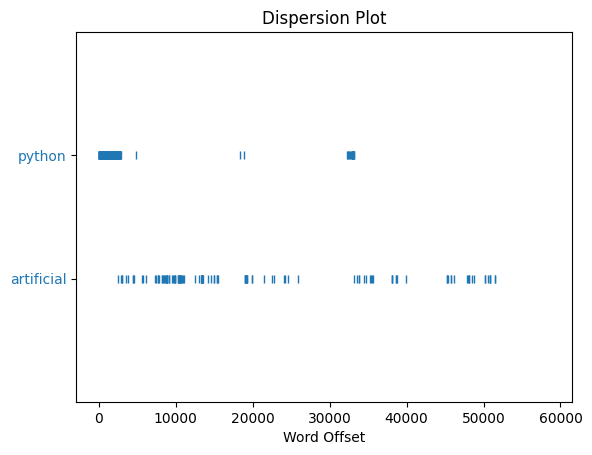


Found 2 result(s):

1. Python (programming language)
Bag of Words: Counter({'python': 160, 'artificial': 1})
Score: N/A

 Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.[33]
 Python is dynamically type-checked and garbage-collected. It supports multiple programming...

2. Artificial intelligence
Bag of Words: Counter({'artificial': 41, 'python': 1})
Score: N/A

 Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive...


Evaluation Metrics:
Precision: 1.0000
Recall: 0.5000
F1-Score: 0.6667
MAP (Mean Average Precision): 0.5000


Choose algorithm (1/2/3/4 or 'exit' to quit):  1
Enter your search query:  Neural OR Network


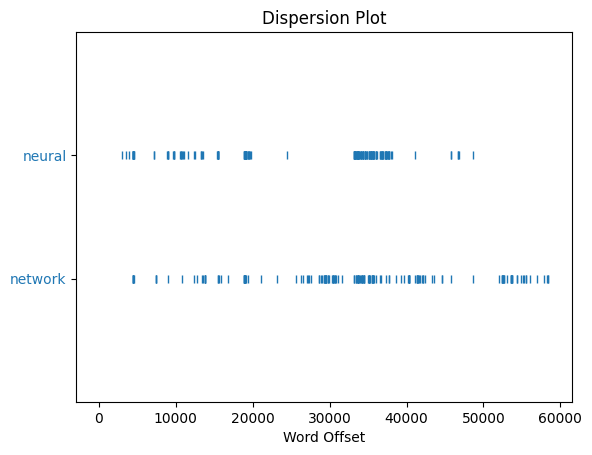


Found 14 result(s):

1. Artificial intelligence
Bag of Words: Counter({'neural': 23, 'network': 10})
Score: N/A

 Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive...

2. Machine learning
Bag of Words: Counter({'neural': 20, 'network': 12})
Score: N/A
Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions.[1] A...

3. Java (programming language)
Bag of Words: Counter({'network': 2})
Score: N/A

 
 Java is a high-level, class-based, object-oriented programming language that is designed to have as few implementation dependencies as possible. It is a general-purpose programming language intended to let pro

Choose algorithm (1/2/3/4 or 'exit' to quit):  1
Enter your search query:  NOT Learning


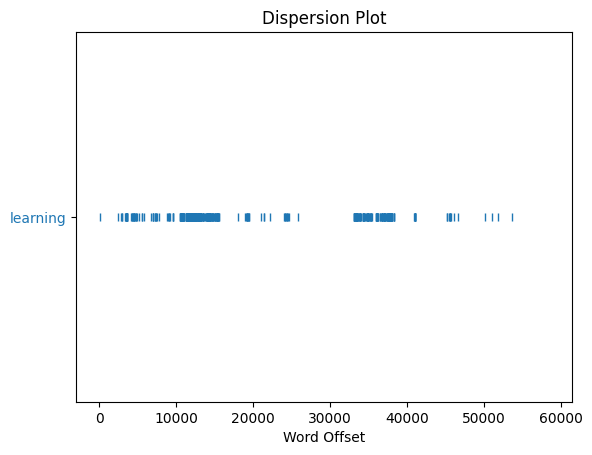


Found 4 result(s):

1. Java (programming language)
Bag of Words: Counter()
Score: N/A

 
 Java is a high-level, class-based, object-oriented programming language that is designed to have as few implementation dependencies as possible. It is a general-purpose programming language intended to let programmers write once, run anywhere (WO...

2. Blockchain
Bag of Words: Counter()
Score: N/A

 A blockchain is a distributed ledger with growing lists of records (blocks) that are securely linked together via cryptographic hashes.[1][2][3][4] Each block contains a cryptographic hash of the previous block, a timestamp, and transaction data (g...

3. Django (web framework)
Bag of Words: Counter()
Score: N/A

 Django (/ˈdʒæŋɡoʊ/ JANG-goh; sometimes stylized as django)[6] is a free and open-source, Python-based web framework that runs on a web server. It follows the model–template–views (MTV) architectural pattern.[7][8] It is maintained by the Django Sof...

4. Flask (web framework)
Bag of Words:

Choose algorithm (1/2/3/4 or 'exit' to quit):  2
Enter your search query:  Introduction to Python programming


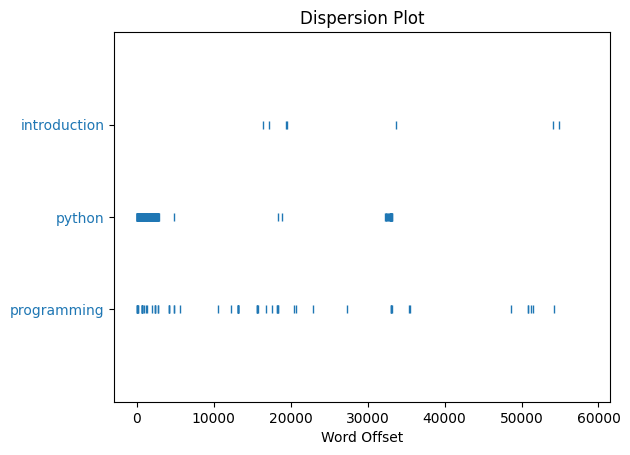


Found 13 result(s):

1. Python (programming language)
Bag of Words: Counter({'python': 160, 'programming': 21})
Score: 0.0851

 Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.[33]
 Python is dynamically type-checked and garbage-collected. It supports multiple programming...

2. Flask (web framework)
Bag of Words: Counter({'python': 12, 'programming': 4})
Score: 0.0752
Flask is a micro web framework written in Python. It is classified as a microframework because it does not require particular tools or libraries.[2] It has no database abstraction layer, form validation, or any other components where pre-existing thi...

3. Django (web framework)
Bag of Words: Counter({'python': 7})
Score: 0.0153

 Django (/ˈdʒæŋɡoʊ/ JANG-goh; sometimes stylized as django)[6] is a free and open-source, Python-based web framework that runs on a web server. It follows the model–template–views (MTV) arch

Choose algorithm (1/2/3/4 or 'exit' to quit):  2
Enter your search query:  Natural language processing methods


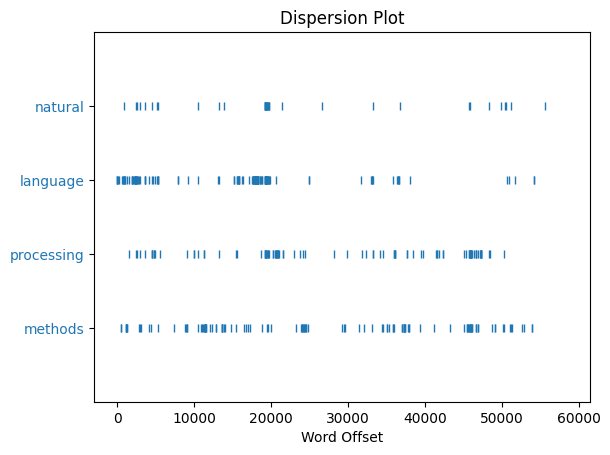


Found 17 result(s):

1. Natural language processing
Bag of Words: Counter({'language': 20, 'natural': 14, 'processing': 10, 'methods': 2})
Score: 0.0578
Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence. It is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to...

2. SQL
Bag of Words: Counter({'language': 25, 'processing': 1, 'methods': 1})
Score: 0.0213

 Structured Query Language (SQL) (pronounced /ˌɛsˌkjuˈɛl/ S-Q-L; or alternatively as /ˈsiːkwəl/ "sequel")[4][5] is a domain-specific language used to manage data, especially in a relational database management system (RDBMS). It is particularly usef...

3. Computer vision
Bag of Words: Counter({'processing': 24, 'methods': 17, 'natural': 2})
Score: 0.0153
Computer vision tasks include methods for acquiring, processing, analyzing, and understanding digital images, and extraction of high-dimensi

Choose algorithm (1/2/3/4 or 'exit' to quit):  3
Enter your search query:  Introduction to Python programming


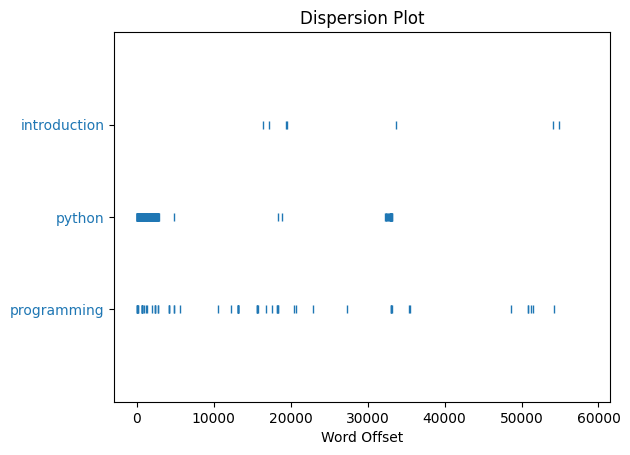


Found 13 result(s):

1. Python (programming language)
Bag of Words: Counter({'python': 160, 'programming': 21})
Score: 1.2673

 Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.[33]
 Python is dynamically type-checked and garbage-collected. It supports multiple programming...

2. Flask (web framework)
Bag of Words: Counter({'python': 12, 'programming': 4})
Score: 0.3524
Flask is a micro web framework written in Python. It is classified as a microframework because it does not require particular tools or libraries.[2] It has no database abstraction layer, form validation, or any other components where pre-existing thi...

3. Django (web framework)
Bag of Words: Counter({'python': 7})
Score: 0.1058

 Django (/ˈdʒæŋɡoʊ/ JANG-goh; sometimes stylized as django)[6] is a free and open-source, Python-based web framework that runs on a web server. It follows the model–template–views (MTV) arch

Choose algorithm (1/2/3/4 or 'exit' to quit):  3
Enter your search query:  Natural language processing methods


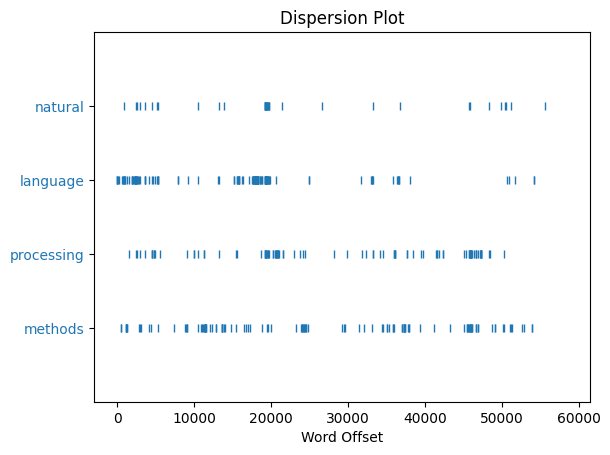


Found 17 result(s):

1. Natural language processing
Bag of Words: Counter({'language': 20, 'natural': 14, 'processing': 10, 'methods': 2})
Score: 0.1575
Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence. It is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to...

2. Computer vision
Bag of Words: Counter({'processing': 24, 'methods': 17, 'natural': 2})
Score: 0.0781
Computer vision tasks include methods for acquiring, processing, analyzing, and understanding digital images, and extraction of high-dimensional data from the real world in order to produce numerical or symbolic information, e.g. in the form of decis...

3. SQL
Bag of Words: Counter({'language': 25, 'processing': 1, 'methods': 1})
Score: 0.0663

 Structured Query Language (SQL) (pronounced /ˌɛsˌkjuˈɛl/ S-Q-L; or alternatively as /ˈsiːkwəl/ "sequel")[4][5] is a domain-specific langua

Choose algorithm (1/2/3/4 or 'exit' to quit):  4
Enter your search query:  Introduction to Python programming


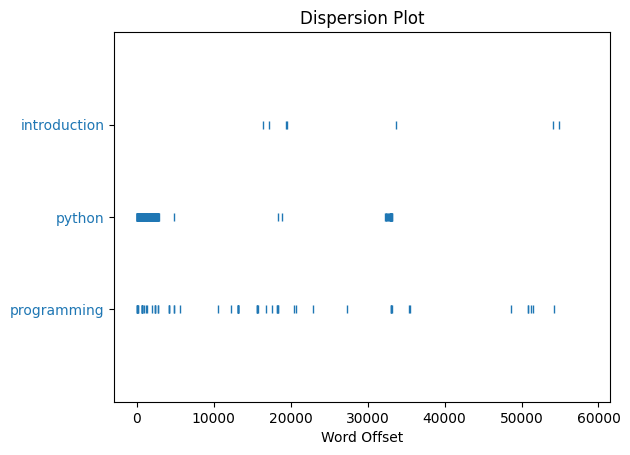


Found 13 result(s):

1. Python (programming language)
Bag of Words: Counter({'python': 160, 'programming': 21})
Score: 5.5887

 Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.[33]
 Python is dynamically type-checked and garbage-collected. It supports multiple programming...

2. Flask (web framework)
Bag of Words: Counter({'python': 12, 'programming': 4})
Score: 5.3862
Flask is a micro web framework written in Python. It is classified as a microframework because it does not require particular tools or libraries.[2] It has no database abstraction layer, form validation, or any other components where pre-existing thi...

3. SQL
Bag of Words: Counter({'programming': 4, 'python': 2})
Score: 4.4681

 Structured Query Language (SQL) (pronounced /ˌɛsˌkjuˈɛl/ S-Q-L; or alternatively as /ˈsiːkwəl/ "sequel")[4][5] is a domain-specific language used to manage data, especially in a relational d

Choose algorithm (1/2/3/4 or 'exit' to quit):  4
Enter your search query:  Natural language processing methods


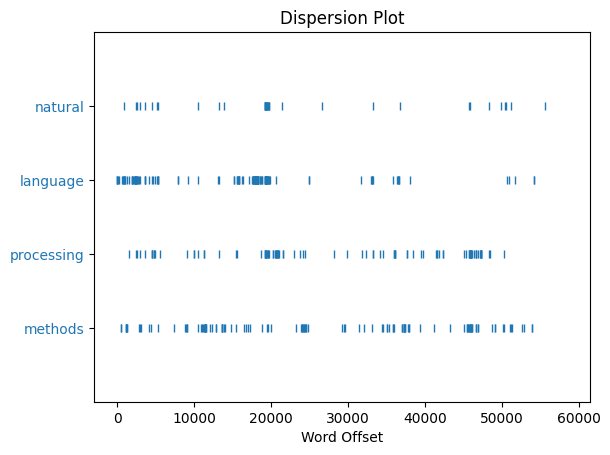


Found 17 result(s):

1. Natural language processing
Bag of Words: Counter({'language': 20, 'natural': 14, 'processing': 10, 'methods': 2})
Score: 7.6944
Natural language processing (NLP) is a subfield of computer science and especially artificial intelligence. It is primarily concerned with providing computers with the ability to process data encoded in natural language and is thus closely related to...

2. Python (programming language)
Bag of Words: Counter({'language': 30, 'methods': 7, 'natural': 3, 'processing': 3})
Score: 6.6576

 Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.[33]
 Python is dynamically type-checked and garbage-collected. It supports multiple programming...

3. Artificial intelligence
Bag of Words: Counter({'language': 15, 'processing': 12, 'methods': 11, 'natural': 5})
Score: 6.3475

 Artificial intelligence (AI), in its broadest sense, is intelligence exhib

Choose algorithm (1/2/3/4 or 'exit' to quit):  exit


Exiting search engine!!! Goodbye!!!


In [15]:
main()